## **TASK 4**
## **Порівняння алгоритмів машинного навчання**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.metrics import precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore')

print("Бібліотеки завантажено успішно")

Бібліотеки завантажено успішно


In [2]:
df = pd.read_csv('customer_churn.csv')

print("Завантажено датасет customer_churn.csv")
print(f"Розмір датасету: {df.shape}")
print(f"\nЦільова змінна - розподіл:")
print(df['Churn'].value_counts())

df_model = df.copy()
df_model['Onboard_date'] = pd.to_datetime(df_model['Onboard_date'])
df_model['Onboard_year'] = df_model['Onboard_date'].dt.year
df_model['Onboard_month'] = df_model['Onboard_date'].dt.month

columns_to_drop = ['Names', 'Location', 'Company', 'Onboard_date']
df_model = df_model.drop(columns=columns_to_drop)

X = df_model.drop('Churn', axis=1)
y = df_model['Churn']

print(f"\nОзнаки для моделювання: {X.columns.tolist()}")
print(f"Кількість ознак: {X.shape[1]}")

Завантажено датасет customer_churn.csv
Розмір датасету: (900, 10)

Цільова змінна - розподіл:
Churn
0    750
1    150
Name: count, dtype: int64

Ознаки для моделювання: ['Age', 'Total_Purchase', 'Account_Manager', 'Years', 'Num_Sites', 'Onboard_year', 'Onboard_month']
Кількість ознак: 7


3: Розділення даних та масштабування

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Тренувальна вибірка: {X_train.shape}")
print(f"Тестова вибірка: {X_test.shape}")
print(f"\nРозподіл у тренувальній вибірці:")
print(y_train.value_counts())

Тренувальна вибірка: (630, 7)
Тестова вибірка: (270, 7)

Розподіл у тренувальній вибірці:
Churn
0    525
1    105
Name: count, dtype: int64


4: Визначення моделей для порівняння

In [4]:
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42, n_estimators=100),
    'SVM': SVC(random_state=42, probability=True),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()
}

print("Моделі для порівняння:")
for i, name in enumerate(models.keys(), 1):
    print(f"{i}. {name}")

Моделі для порівняння:
1. Logistic Regression
2. Decision Tree
3. Random Forest
4. Gradient Boosting
5. SVM
6. K-Nearest Neighbors
7. Naive Bayes


5: Навчання та оцінка всіх моделей

In [5]:
results = {}

print("Навчання моделей...\n")
print("=" * 80)

for name, model in models.items():
    print(f"\nНавчання моделі: {name}")

    model.fit(X_train_scaled, y_train)

    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, 'predict_proba') else None

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    if y_pred_proba is not None:
        roc_auc = roc_auc_score(y_test, y_pred_proba)
    else:
        roc_auc = None

    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')

    results[name] = {
        'model': model,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'roc_auc': roc_auc,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std()
    }

    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-Score: {f1:.4f}")
    if roc_auc:
        print(f"  ROC-AUC: {roc_auc:.4f}")
    print(f"  Cross-validation: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")

print("\n" + "=" * 80)
print("Навчання завершено!")

Навчання моделей...


Навчання моделі: Logistic Regression
  Accuracy: 0.8926
  Precision: 0.7857
  Recall: 0.4889
  F1-Score: 0.6027
  ROC-AUC: 0.9232
  Cross-validation: 0.8825 (+/- 0.0197)

Навчання моделі: Decision Tree
  Accuracy: 0.8333
  Precision: 0.5000
  Recall: 0.5111
  F1-Score: 0.5055
  ROC-AUC: 0.7044
  Cross-validation: 0.8159 (+/- 0.0248)

Навчання моделі: Random Forest
  Accuracy: 0.8889
  Precision: 0.8261
  Recall: 0.4222
  F1-Score: 0.5588
  ROC-AUC: 0.8670
  Cross-validation: 0.8873 (+/- 0.0184)

Навчання моделі: Gradient Boosting
  Accuracy: 0.8926
  Precision: 0.7857
  Recall: 0.4889
  F1-Score: 0.6027
  ROC-AUC: 0.8817
  Cross-validation: 0.8683 (+/- 0.0129)

Навчання моделі: SVM
  Accuracy: 0.8778
  Precision: 0.8333
  Recall: 0.3333
  F1-Score: 0.4762
  ROC-AUC: 0.8669
  Cross-validation: 0.8794 (+/- 0.0059)

Навчання моделі: K-Nearest Neighbors
  Accuracy: 0.8815
  Precision: 0.9333
  Recall: 0.3111
  F1-Score: 0.4667
  ROC-AUC: 0.8584
  Cross-validation: 0.8

In [6]:
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[m]['accuracy'] for m in results.keys()],
    'Precision': [results[m]['precision'] for m in results.keys()],
    'Recall': [results[m]['recall'] for m in results.keys()],
    'F1-Score': [results[m]['f1_score'] for m in results.keys()],
    'ROC-AUC': [results[m]['roc_auc'] if results[m]['roc_auc'] else 0 for m in results.keys()],
    'CV Mean': [results[m]['cv_mean'] for m in results.keys()],
    'CV Std': [results[m]['cv_std'] for m in results.keys()]
})

comparison_df = comparison_df.sort_values('Accuracy', ascending=False)

print("\n" + "=" * 80)
print("ПОРІВНЯЛЬНА ТАБЛИЦЯ РЕЗУЛЬТАТІВ")
print("=" * 80)
print(comparison_df.to_string(index=False))

print("\n" + "=" * 80)
print("РЕЙТИНГ МОДЕЛЕЙ ЗА ACCURACY:")
print("=" * 80)
for i, row in comparison_df.iterrows():
    print(f"{comparison_df.index.get_loc(i) + 1}. {row['Model']}: {row['Accuracy']:.4f}")


ПОРІВНЯЛЬНА ТАБЛИЦЯ РЕЗУЛЬТАТІВ
              Model  Accuracy  Precision   Recall  F1-Score  ROC-AUC  CV Mean   CV Std
Logistic Regression  0.892593   0.785714 0.488889  0.602740 0.923160 0.882540 0.019698
        Naive Bayes  0.892593   0.785714 0.488889  0.602740 0.920099 0.880952 0.022448
  Gradient Boosting  0.892593   0.785714 0.488889  0.602740 0.881679 0.868254 0.012895
      Random Forest  0.888889   0.826087 0.422222  0.558824 0.867012 0.887302 0.018374
K-Nearest Neighbors  0.881481   0.933333 0.311111  0.466667 0.858370 0.863492 0.029440
                SVM  0.877778   0.833333 0.333333  0.476190 0.866864 0.879365 0.005939
      Decision Tree  0.833333   0.500000 0.511111  0.505495 0.704444 0.815873 0.024794

РЕЙТИНГ МОДЕЛЕЙ ЗА ACCURACY:
1. Logistic Regression: 0.8926
2. Naive Bayes: 0.8926
3. Gradient Boosting: 0.8926
4. Random Forest: 0.8889
5. K-Nearest Neighbors: 0.8815
6. SVM: 0.8778
7. Decision Tree: 0.8333


## Візуалізація порівняння моделей

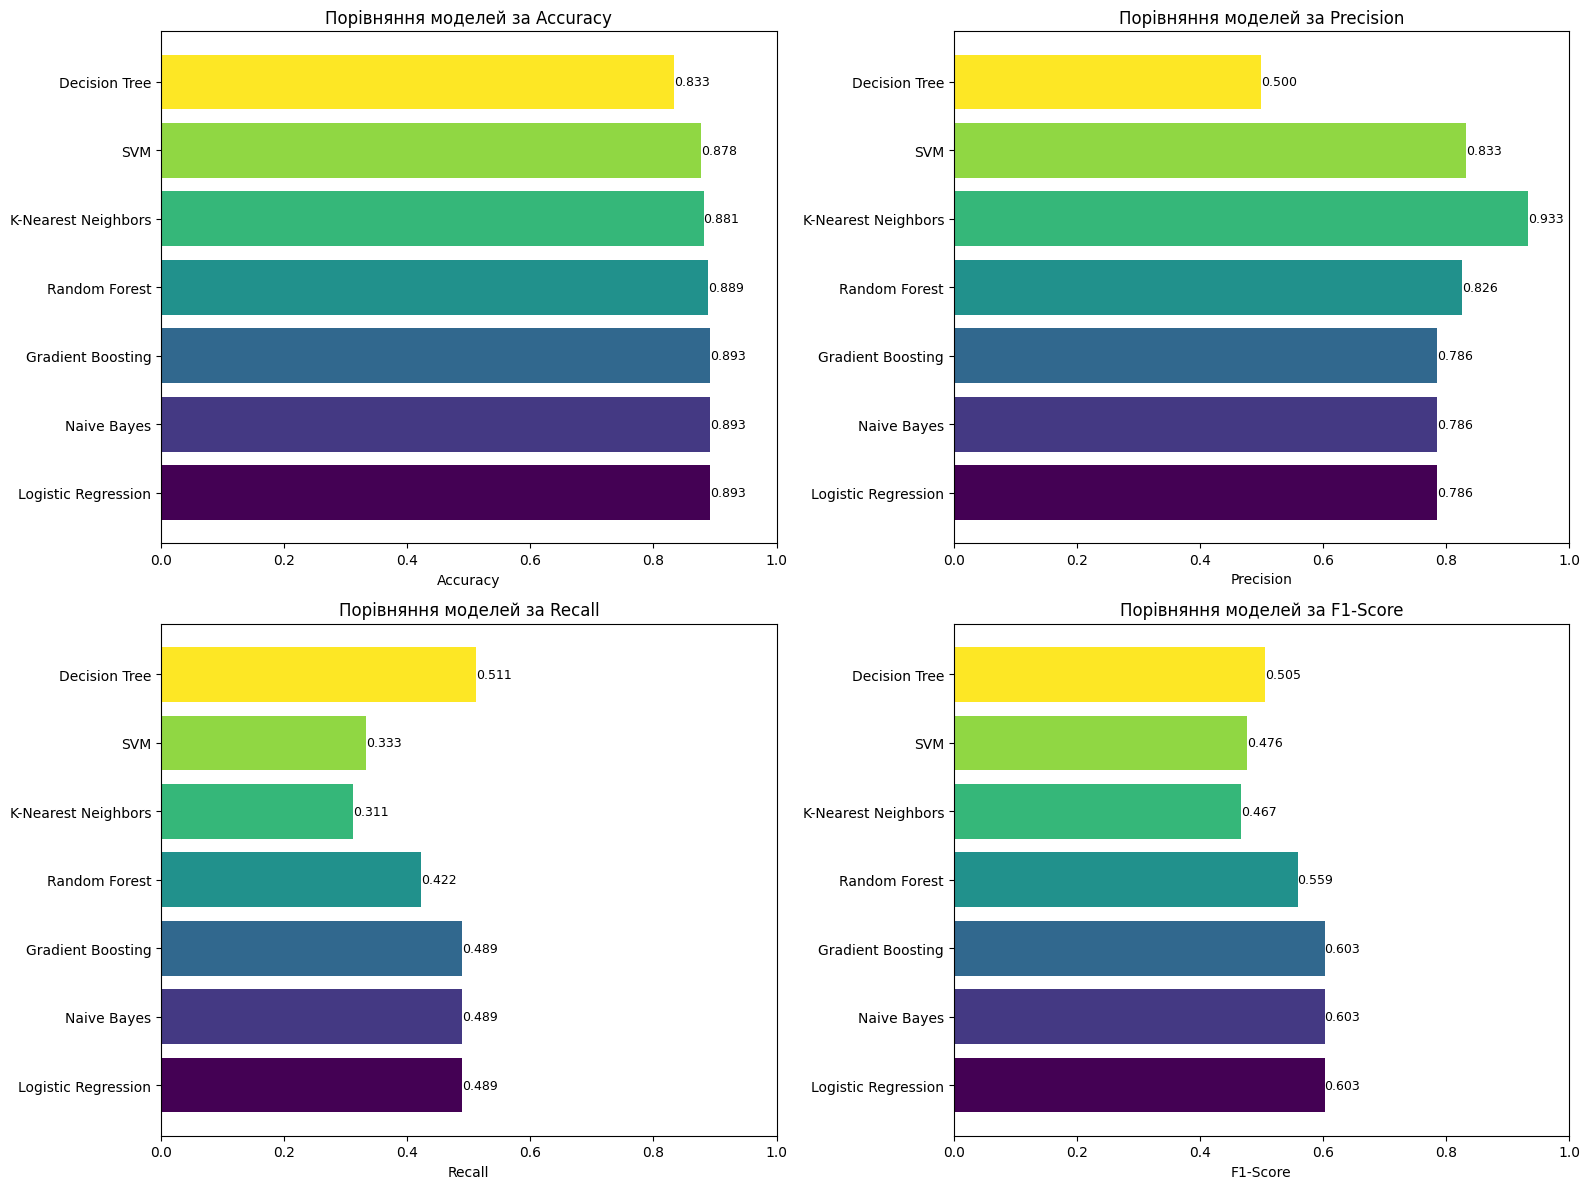

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
colors = plt.cm.viridis(np.linspace(0, 1, len(comparison_df)))

for idx, metric in enumerate(metrics):
    ax = axes[idx // 2, idx % 2]
    bars = ax.barh(comparison_df['Model'], comparison_df[metric], color=colors)
    ax.set_xlabel(metric)
    ax.set_title(f'Порівняння моделей за {metric}')
    ax.set_xlim(0, 1)

    for i, bar in enumerate(bars):
        width = bar.get_width()
        ax.text(width, bar.get_y() + bar.get_height()/2,
                f'{width:.3f}', ha='left', va='center', fontsize=9)

plt.tight_layout()
plt.show()

8: ROC-криві для всіх моделей

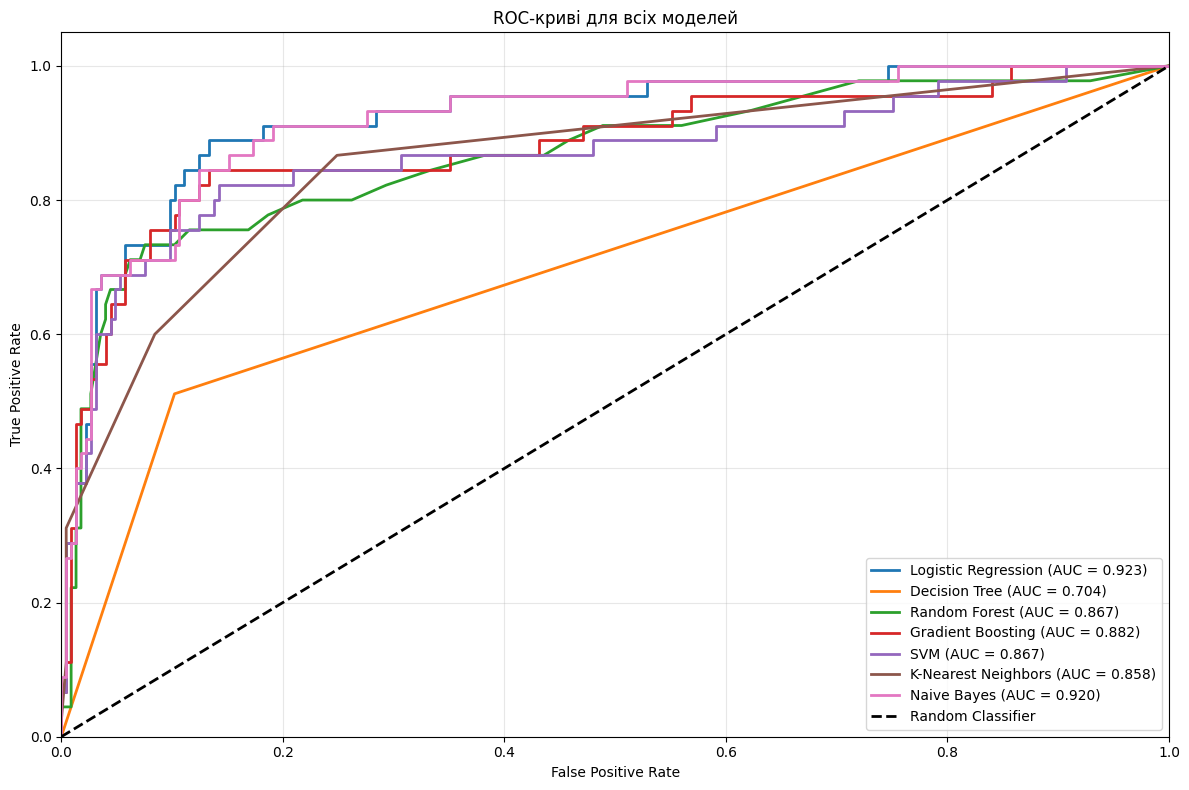

In [8]:
plt.figure(figsize=(12, 8))

for name, result in results.items():
    if result['y_pred_proba'] is not None:
        fpr, tpr, _ = roc_curve(y_test, result['y_pred_proba'])
        roc_auc = result['roc_auc']
        plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.3f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-криві для всіх моделей')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

9: Матриці помилок для топ-3 моделей

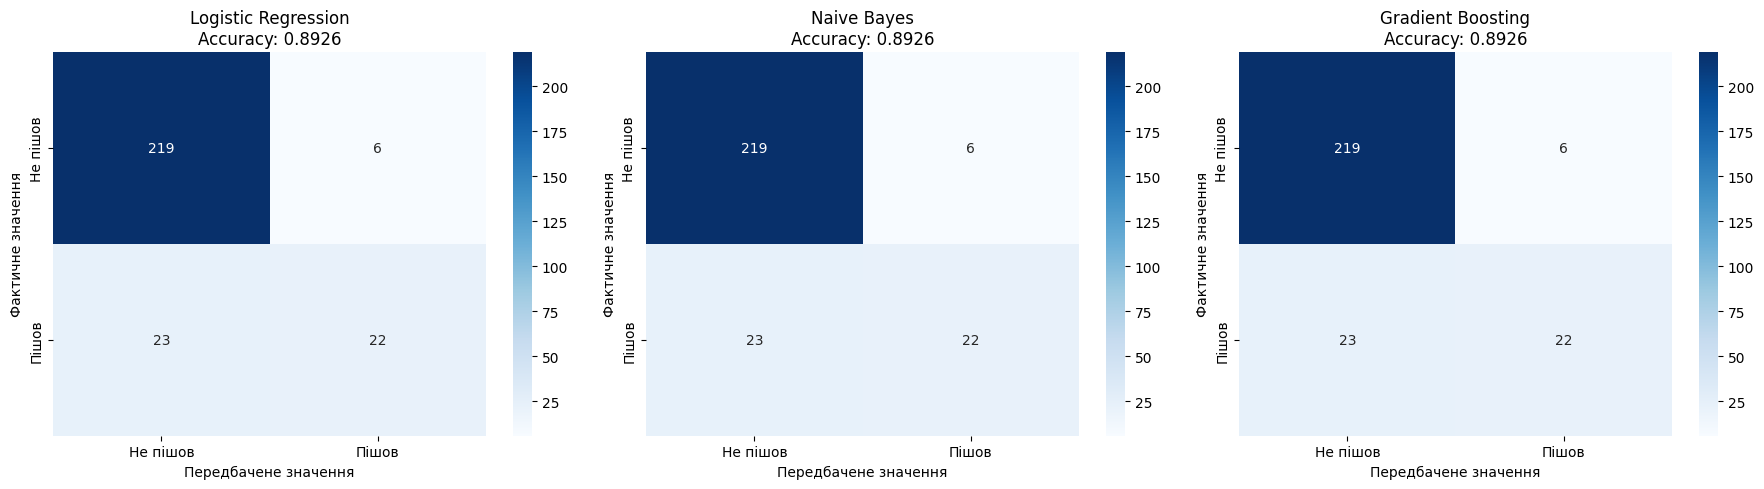

In [9]:
top_3_models = comparison_df.head(3)['Model'].tolist()

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, model_name in enumerate(top_3_models):
    cm = confusion_matrix(y_test, results[model_name]['y_pred'])

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx],
                xticklabels=['Не пішов', 'Пішов'],
                yticklabels=['Не пішов', 'Пішов'])
    axes[idx].set_title(f'{model_name}\nAccuracy: {results[model_name]["accuracy"]:.4f}')
    axes[idx].set_ylabel('Фактичне значення')
    axes[idx].set_xlabel('Передбачене значення')

plt.tight_layout()
plt.show()

10: Детальний звіт для найкращої моделі

In [10]:
best_model_name = comparison_df.iloc[0]['Model']
best_model_results = results[best_model_name]

print("\n" + "=" * 80)
print(f"НАЙКРАЩА МОДЕЛЬ: {best_model_name}")
print("=" * 80)

print(f"\nМетрики на тестовій вибірці:")
print(f"  Accuracy:  {best_model_results['accuracy']:.4f}")
print(f"  Precision: {best_model_results['precision']:.4f}")
print(f"  Recall:    {best_model_results['recall']:.4f}")
print(f"  F1-Score:  {best_model_results['f1_score']:.4f}")
if best_model_results['roc_auc']:
    print(f"  ROC-AUC:   {best_model_results['roc_auc']:.4f}")

print(f"\nКрос-валідація (5-fold):")
print(f"  Середнє: {best_model_results['cv_mean']:.4f}")
print(f"  Std:     {best_model_results['cv_std']:.4f}")

print(f"\nClassification Report:")
print(classification_report(y_test, best_model_results['y_pred'],
                          target_names=['Не пішов', 'Пішов']))

cm = confusion_matrix(y_test, best_model_results['y_pred'])
print(f"\nМатриця помилок:")
print(f"  True Negatives:  {cm[0, 0]}")
print(f"  False Positives: {cm[0, 1]}")
print(f"  False Negatives: {cm[1, 0]}")
print(f"  True Positives:  {cm[1, 1]}")


НАЙКРАЩА МОДЕЛЬ: Logistic Regression

Метрики на тестовій вибірці:
  Accuracy:  0.8926
  Precision: 0.7857
  Recall:    0.4889
  F1-Score:  0.6027
  ROC-AUC:   0.9232

Крос-валідація (5-fold):
  Середнє: 0.8825
  Std:     0.0197

Classification Report:
              precision    recall  f1-score   support

    Не пішов       0.90      0.97      0.94       225
       Пішов       0.79      0.49      0.60        45

    accuracy                           0.89       270
   macro avg       0.85      0.73      0.77       270
weighted avg       0.89      0.89      0.88       270


Матриця помилок:
  True Negatives:  219
  False Positives: 6
  False Negatives: 23
  True Positives:  22


11: Оптимізація найкращої моделі через GridSearch

In [11]:
print("\n" + "=" * 80)
print(f"ОПТИМІЗАЦІЯ НАЙКРАЩОЇ МОДЕЛІ: {best_model_name}")
print("=" * 80)

if best_model_name == 'Random Forest':
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    }
    base_model = RandomForestClassifier(random_state=42)

elif best_model_name == 'Gradient Boosting':
    param_grid = {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    }
    base_model = GradientBoostingClassifier(random_state=42)

elif best_model_name == 'Logistic Regression':
    param_grid = {
        'C': [0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga']
    }
    base_model = LogisticRegression(random_state=42, max_iter=1000)

elif best_model_name == 'SVM':
    param_grid = {
        'C': [0.1, 1, 10],
        'gamma': ['scale', 'auto', 0.1, 1],
        'kernel': ['rbf', 'linear']
    }
    base_model = SVC(random_state=42, probability=True)

else:
    param_grid = {}
    base_model = results[best_model_name]['model']

if param_grid:
    print("\nПараметри для оптимізації:")
    for param, values in param_grid.items():
        print(f"  {param}: {values}")

    print("\nЗапуск GridSearchCV...")
    grid_search = GridSearchCV(base_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
    grid_search.fit(X_train_scaled, y_train)

    print(f"\nНайкращі параметри: {grid_search.best_params_}")
    print(f"Найкращий score (CV): {grid_search.best_score_:.4f}")

    optimized_model = grid_search.best_estimator_
    y_pred_optimized = optimized_model.predict(X_test_scaled)
    accuracy_optimized = accuracy_score(y_test, y_pred_optimized)

    print(f"\nAccuracy оптимізованої моделі: {accuracy_optimized:.4f}")
    print(f"Покращення: {(accuracy_optimized - best_model_results['accuracy']):.4f}")
else:
    print("\nGridSearch не застосовується для цієї моделі")
    optimized_model = base_model


ОПТИМІЗАЦІЯ НАЙКРАЩОЇ МОДЕЛІ: Logistic Regression

Параметри для оптимізації:
  C: [0.01, 0.1, 1, 10, 100]
  penalty: ['l1', 'l2']
  solver: ['liblinear', 'saga']

Запуск GridSearchCV...
Fitting 5 folds for each of 20 candidates, totalling 100 fits

Найкращі параметри: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Найкращий score (CV): 0.8857

Accuracy оптимізованої моделі: 0.8852
Покращення: -0.0074


12: Аналіз важливості ознак


АНАЛІЗ ВАЖЛИВОСТІ ОЗНАК

Коефіцієнти моделі:
        Feature  Coefficient  Abs_Coefficient
      Num_Sites     1.274387         1.274387
          Years     0.491214         0.491214
            Age     0.203776         0.203776
Account_Manager     0.172139         0.172139
  Onboard_month     0.104525         0.104525
 Total_Purchase     0.050196         0.050196
   Onboard_year    -0.011377         0.011377


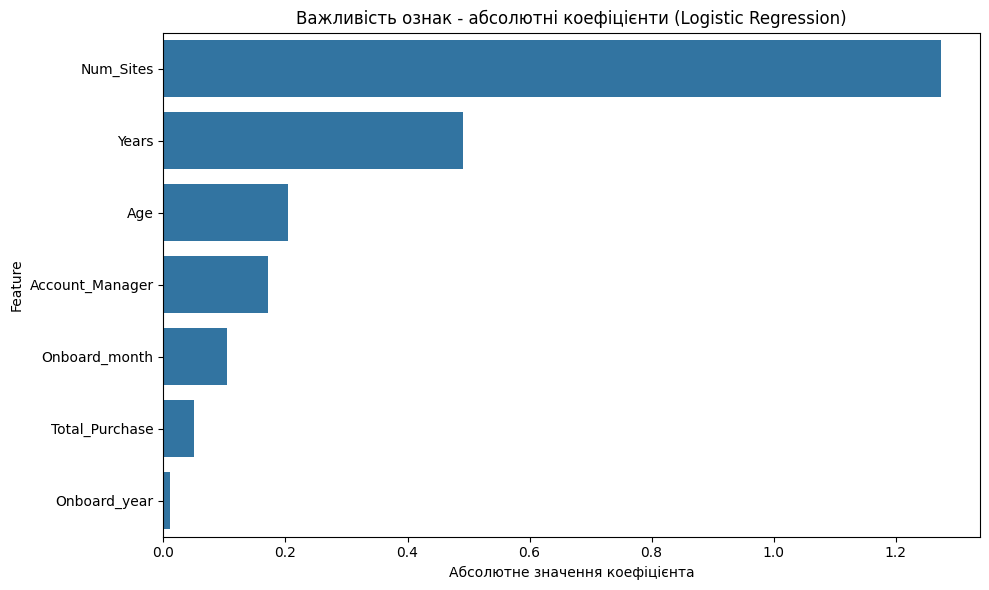

In [12]:
print("\n" + "=" * 80)
print("АНАЛІЗ ВАЖЛИВОСТІ ОЗНАК")
print("=" * 80)

if hasattr(optimized_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': optimized_model.feature_importances_
    }).sort_values('Importance', ascending=False)

    print("\nВажливість ознак:")
    print(feature_importance.to_string(index=False))

    plt.figure(figsize=(10, 6))
    sns.barplot(data=feature_importance, x='Importance', y='Feature')
    plt.title(f'Важливість ознак ({best_model_name})')
    plt.xlabel('Важливість')
    plt.tight_layout()
    plt.show()

elif hasattr(optimized_model, 'coef_'):
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Coefficient': optimized_model.coef_[0],
        'Abs_Coefficient': np.abs(optimized_model.coef_[0])
    }).sort_values('Abs_Coefficient', ascending=False)

    print("\nКоефіцієнти моделі:")
    print(feature_importance.to_string(index=False))

    plt.figure(figsize=(10, 6))
    sns.barplot(data=feature_importance, x='Abs_Coefficient', y='Feature')
    plt.title(f'Важливість ознак - абсолютні коефіцієнти ({best_model_name})')
    plt.xlabel('Абсолютне значення коефіцієнта')
    plt.tight_layout()
    plt.show()
else:
    print("\nАналіз важливості ознак недоступний для цієї моделі")

13: Фінальні висновки та рекомендації

In [14]:

print("ФІНАЛЬНІ ВИСНОВКИ")

print(f"\n1. ПОРІВНЯННЯ МОДЕЛЕЙ:")
print(f"   Всього протестовано моделей: {len(models)}")
print(f"   Найкраща модель: {best_model_name}")
print(f"   Accuracy найкращої моделі: {best_model_results['accuracy']:.4f}")

print(f"\n2. ТОП-3 МОДЕЛІ:")
for i, row in comparison_df.head(3).iterrows():
    print(f"   {comparison_df.index.get_loc(i) + 1}. {row['Model']}: {row['Accuracy']:.4f}")

print(f"\n3. КЛЮЧОВІ МЕТРИКИ НАЙКРАЩОЇ МОДЕЛІ:")
print(f"   Accuracy:  {best_model_results['accuracy']:.4f} - точність передбачень")
print(f"   Precision: {best_model_results['precision']:.4f} - точність позитивних передбачень")
print(f"   Recall:    {best_model_results['recall']:.4f} - повнота виявлення відтоків")
print(f"   F1-Score:  {best_model_results['f1_score']:.4f} - гармонійне середнє precision та recall")

if best_model_results['roc_auc']:
    print(f"   ROC-AUC:   {best_model_results['roc_auc']:.4f} - якість класифікації")

print(f"\n4. РЕКОМЕНДАЦІЇ:")
print(f"   - Використовувати {best_model_name} для прогнозування відтоку клієнтів")
print(f"   - Модель показує стабільні результати на крос-валідації")
print(f"   - Рекомендується регулярно переоцінювати модель на нових даних")
print(f"   - Звертати увагу на найважливіші ознаки при роботі з клієнтами")


ФІНАЛЬНІ ВИСНОВКИ

1. ПОРІВНЯННЯ МОДЕЛЕЙ:
   Всього протестовано моделей: 7
   Найкраща модель: Logistic Regression
   Accuracy найкращої моделі: 0.8926

2. ТОП-3 МОДЕЛІ:
   1. Logistic Regression: 0.8926
   2. Naive Bayes: 0.8926
   3. Gradient Boosting: 0.8926

3. КЛЮЧОВІ МЕТРИКИ НАЙКРАЩОЇ МОДЕЛІ:
   Accuracy:  0.8926 - точність передбачень
   Precision: 0.7857 - точність позитивних передбачень
   Recall:    0.4889 - повнота виявлення відтоків
   F1-Score:  0.6027 - гармонійне середнє precision та recall
   ROC-AUC:   0.9232 - якість класифікації

4. РЕКОМЕНДАЦІЇ:
   - Використовувати Logistic Regression для прогнозування відтоку клієнтів
   - Модель показує стабільні результати на крос-валідації
   - Рекомендується регулярно переоцінювати модель на нових даних
   - Звертати увагу на найважливіші ознаки при роботі з клієнтами
